# Mental Health Data

Buscaremos predecir la variable objetivo `Depresión` del dataset de `Salud Mental`, recopilado como parte de una encuesta integral destinada a entender los factores que contribuyen al riesgo de depresión entre adultos.

Se realizó durante una encuesta anónima llevada a cabo entre enero y junio de 2023. La encuesta se realizó en varias ciudades, dirigiéndose a personas de diversos orígenes y profesiones. Los participantes, que tenían entre 18 y 60 años, proporcionaron voluntariamente información sobre factores como la edad, el género, la ciudad, el título académico, la satisfacción laboral, la satisfacción con los estudios, las horas de estudio/trabajo y antecedentes familiares, entre otros.

Contiene 140,700 registros en el `train set`, con 20 variables:

| Variables                              |
|----------------------------------------|
| id                                     |
| Nombre                                 |
| Género                                 |
| Edad                                   |
| Ciudad                                 |
| Profesionista/Estudiante               |
| Profesión                              |
| Presión_académica                      |
| Presión_laboral                        |
| CGPA                                   |
| Satisfacción_académica                 |
| Satisfacción_laboral                   |
| Tiempo_dormir                          |
| Hábitos_alimenticios                   |
| Grado_académico                        |
| Pensamientos_suicidas                  |
| Horas_estudio/trabajo                  |
| Estrés_financiero                      |
| Antecedente_familiar_enfermedad_mental |
| Depresión                              |

# Preprocesamiento del data
Como primer paso para analizar la información contenida en los dataset

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set_palette("pastel")

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/Users/blancagarcia/Documents/3er_Sem/Aprendizaje_máquina/ProyectoFinal/Mental_Health/data/train.csv")

In [4]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Checar cuales variables tienen NaN

In [5]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
train.rename(columns={
    'Working Professional or Student': 'Work_Study',
    'Academic Pressure': 'Acad_Press',
    'Work Pressure': 'Work_Press',
    'Study Satisfaction': 'Study_Sat',
    'Job Satisfaction': 'Job_Sat',
    'Sleep Duration': 'Sleep_Duration',
    'Dietary Habits': 'Diet_Habits',
    'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts',
    'Work/Study Hours': 'Work_Study_Hours',
    'Financial Stress': 'Fin_Stress',
    'Family History of Mental Illness': 'Fam_History_Mental_Ill'
}, inplace=True)

Corregimos las variables que tienen NaN, ya sea con la moda o con el promedio si son numéricas.

In [7]:
# Descripción estadística de la variable Financial Stress
print(train['Fin_Stress'].describe())

# Moda de la variable Financial Stress
mode_finan = train['Fin_Stress'].mode()[0]

count    140696.000000
mean          2.988983
std           1.413633
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Fin_Stress, dtype: float64


In [8]:
train['Fin_Stress'].fillna(mode_finan, inplace=True)

Ahora con la variable Degree

In [9]:
# Descripción estadística de la variable Degree
print(train['Degree'].describe())

# Obtener la moda de la variable Degree
mode_degree = train['Degree'].mode()[0]

count       140698
unique         115
top       Class 12
freq         14729
Name: Degree, dtype: object


In [10]:
train['Degree'].fillna(mode_degree, inplace=True)

Ahora con la variable Dietary Habits

In [11]:
# Descripción estadística de la variable Dietary Habits
print(train['Diet_Habits'].describe())

# Obtener la moda de la variable Dietary Habits
mode_diet = train['Diet_Habits'].mode()[0]

count       140696
unique          23
top       Moderate
freq         49705
Name: Diet_Habits, dtype: object


In [12]:
train['Diet_Habits'].fillna(mode_diet, inplace=True)

Ahora con Job Satisfaction

In [13]:
# Descripción estadística de la variable Job Satisfaction
print(train['Job_Sat'].describe())

# Obtener la moda de la variable Job Satisfaction
mode_jobsat = train['Job_Sat'].mode()[0]

count    112790.000000
mean          2.974404
std           1.416078
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Job_Sat, dtype: float64


In [14]:
train['Job_Sat'].fillna(mode_jobsat, inplace=True)

Ahora con Study satisfaction

In [15]:
# Descripción estadística de la variable Study Satisfaction
print(train['Study_Sat'].describe())

# Obtener la moda de la variable Study Satisfaction
mode_studysat = train['Study_Sat'].mode()[0]

count    27897.000000
mean         2.944940
std          1.360197
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Study_Sat, dtype: float64


In [16]:
train['Study_Sat'].fillna(mode_studysat, inplace=True)

In [17]:
# Descripción estadística de la variable Profession
print(train['Profession'].describe())

# Obtener la moda de la variable Study Satisfaction
mode_profess = train['Profession'].mode()[0]

count      104070
unique         64
top       Teacher
freq        24906
Name: Profession, dtype: object


In [18]:
train['Profession'].fillna(mode_profess, inplace=True)

In [19]:
print(train['Acad_Press'].describe())
mode_acadpress = train['Acad_Press'].mode()[0]

count    27897.000000
mean         3.142273
std          1.380457
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Acad_Press, dtype: float64


In [20]:
train['Acad_Press'].fillna(mode_acadpress, inplace=True)

In [21]:
print(train['Work_Press'].describe())
mode_workpress = train['Work_Press'].mode()[0]

count    112782.000000
mean          2.998998
std           1.405771
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work_Press, dtype: float64


In [22]:
train['Work_Press'].fillna(mode_workpress, inplace=True)

La variable de CGPA considera el promedio de calificacion obtenida por el paciente, por lo que para el llenado de los NaN se utilizara el promedio de esta variable en lugar de la moda.

In [23]:
print(train['CGPA'].describe())

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64


In [24]:
# Calcular el promedio de la variable CGPA
mean_cgpa = train['CGPA'].mean()

# Reemplazar los valores NaN con el promedio calculado
train['CGPA'].fillna(mean_cgpa, inplace=True)

## EDA

Ahora analizamos más las variables después del prepsocesamiento que hicimos.

Primero vemos como se ve la variable depresión en la que, observamos que nuestra base está desbalanceada

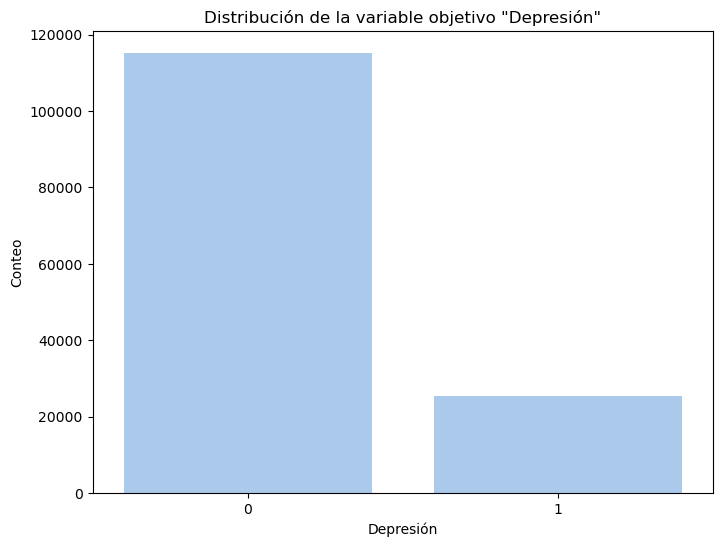

In [25]:
# Visualizar la distribución de la variable objetivo "Depresión"
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', data=train)
plt.title('Distribución de la variable objetivo "Depresión"')
plt.xlabel('Depresión')
plt.ylabel('Conteo')
plt.show()

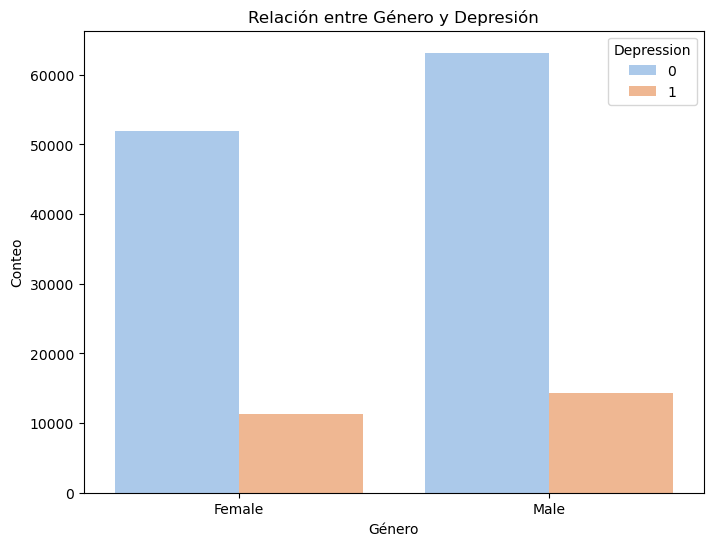

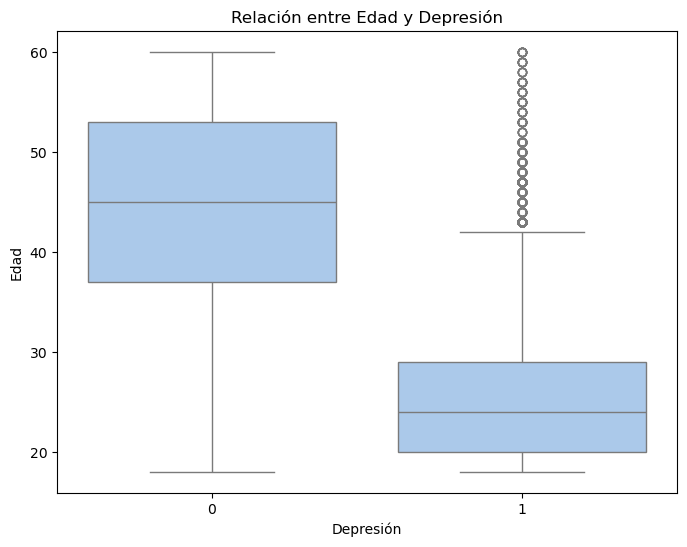

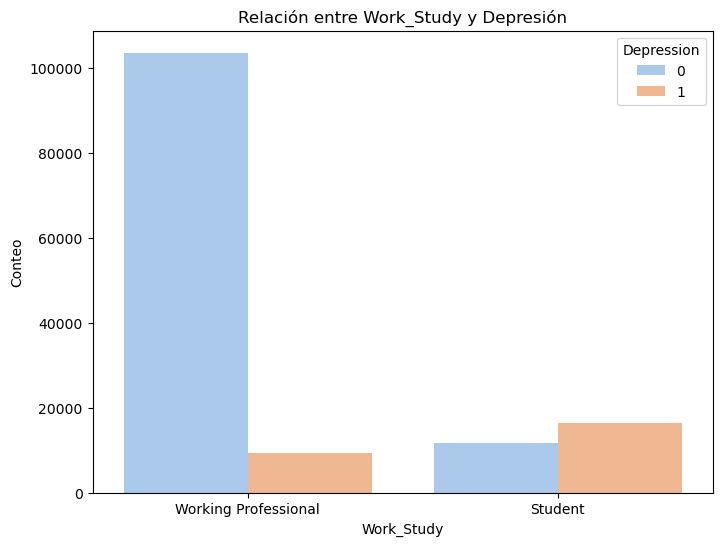

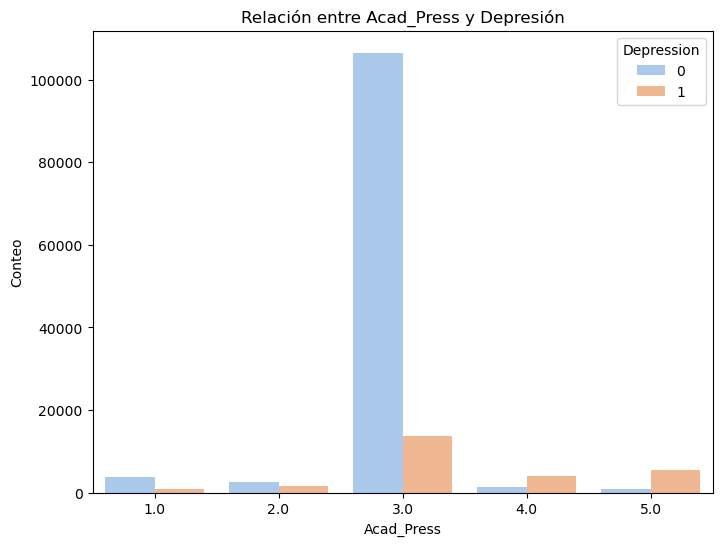

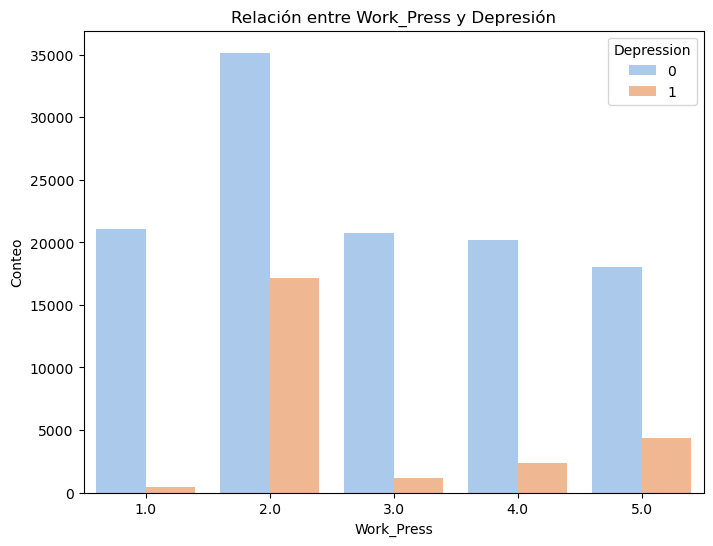

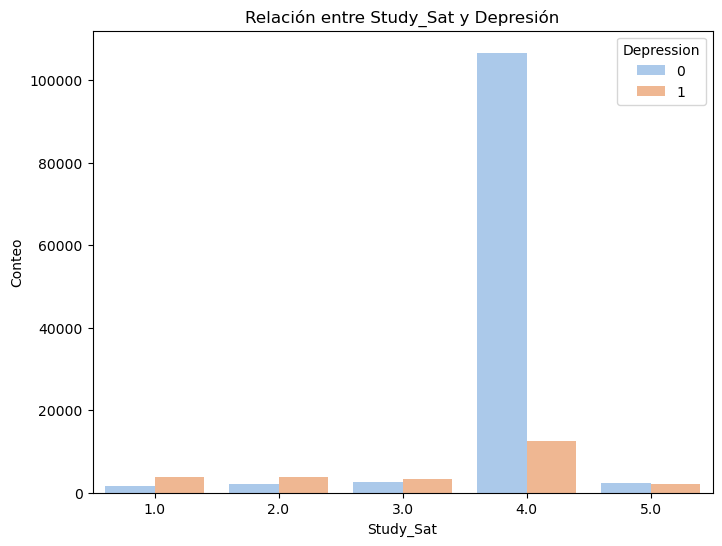

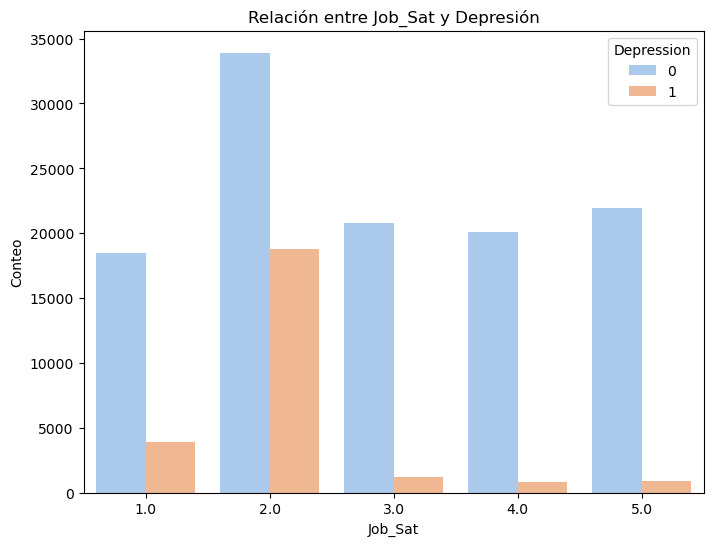

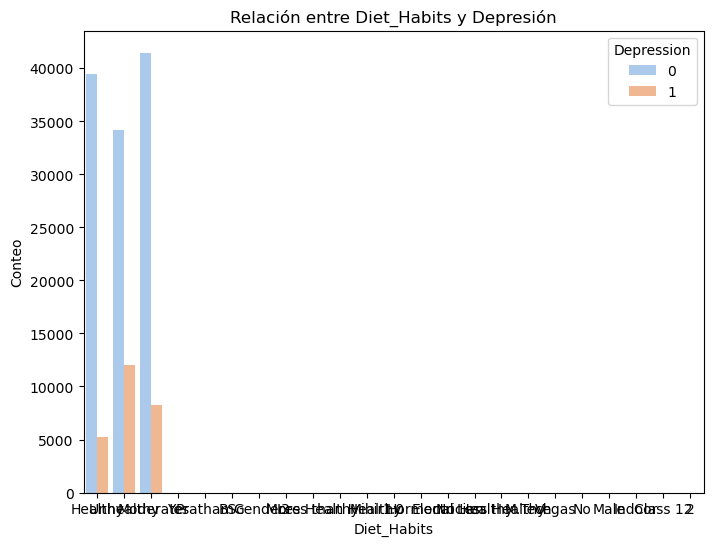

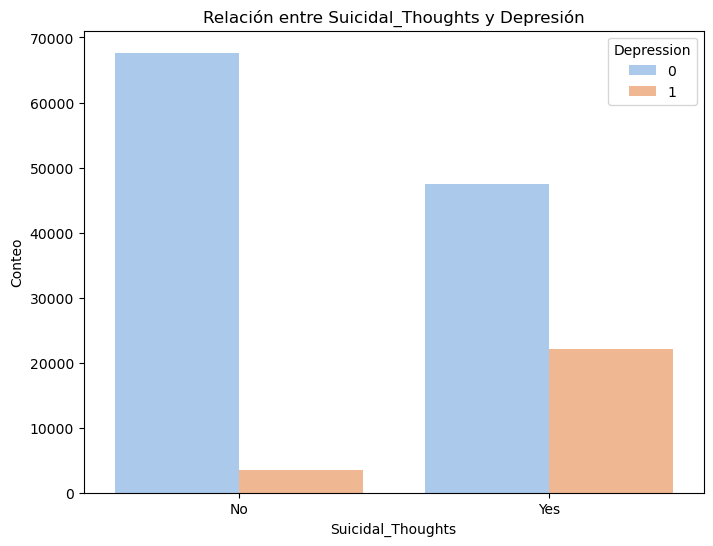

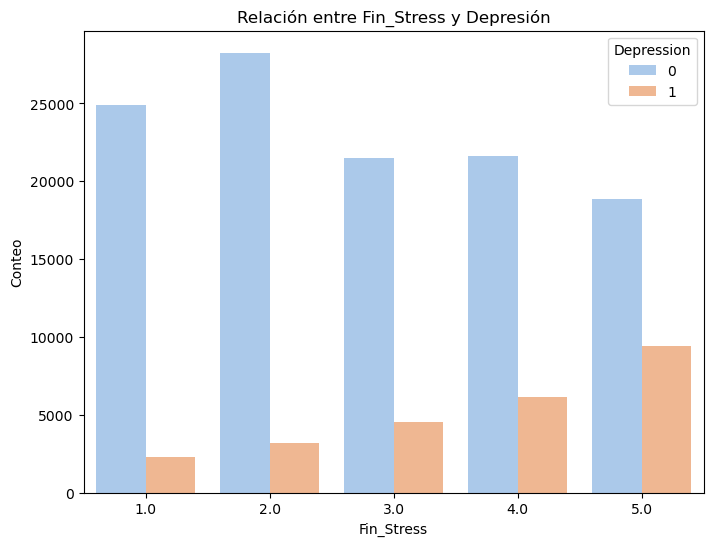

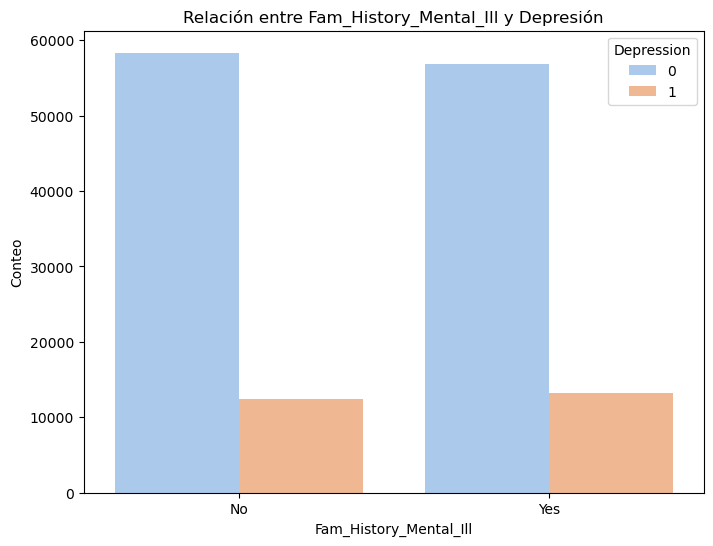

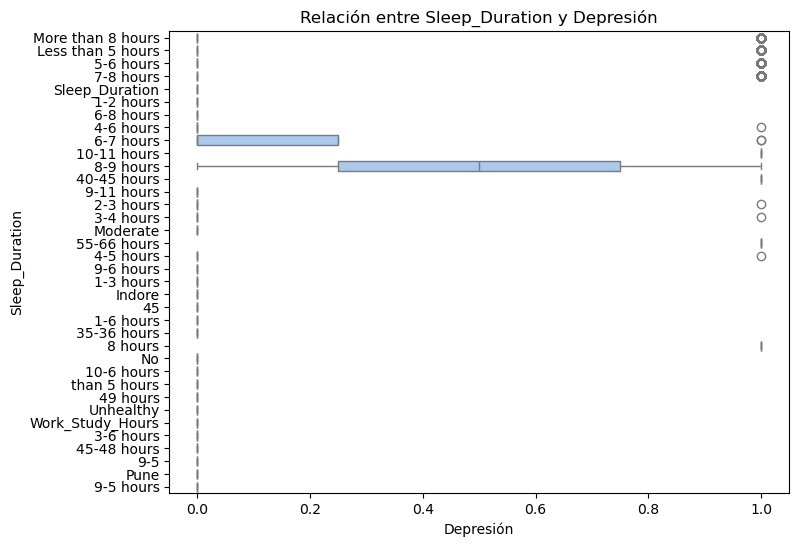

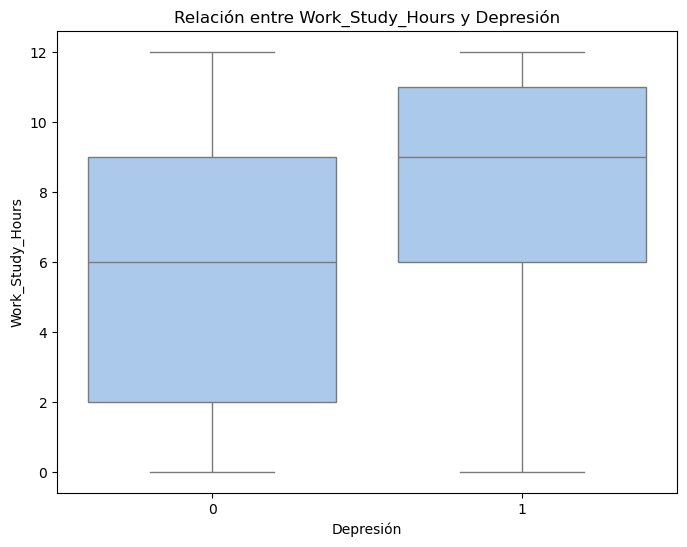

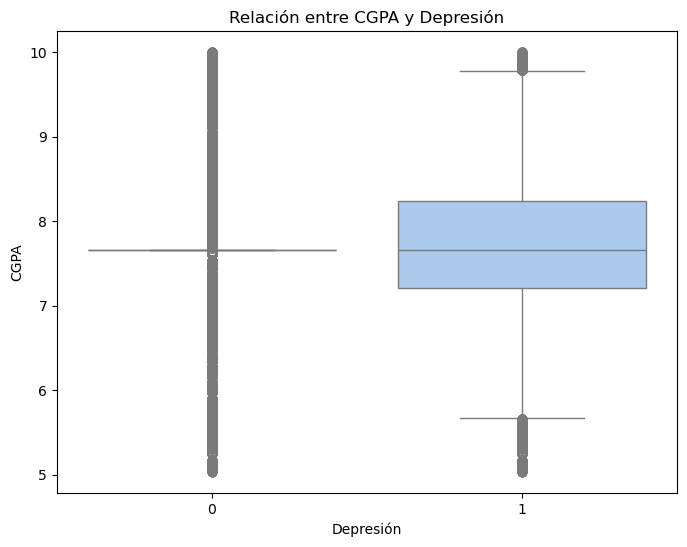

In [26]:
# Relación entre la variable objetivo "Depresión" y la variable categórica "Género"
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Depression', data=train)
plt.title('Relación entre Género y Depresión')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

# Relación entre la variable objetivo "Depresión" y la variable numérica "Edad"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Depression', y='Age', data=train)
plt.title('Relación entre Edad y Depresión')
plt.xlabel('Depresión')
plt.ylabel('Edad')
plt.show()
# Relación entre la variable objetivo "Depresión" y otras variables categóricas importantes
categorical_vars = ['Work_Study', 'Acad_Press', 'Work_Press', 'Study_Sat', 'Job_Sat', 'Diet_Habits', 'Suicidal_Thoughts', 'Fin_Stress', 'Fam_History_Mental_Ill']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='Depression', data=train)
    plt.title(f'Relación entre {var} y Depresión')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.show()

# Relación entre la variable objetivo "Depresión" y otras variables numéricas importantes
numerical_vars = ['Sleep_Duration', 'Work_Study_Hours', 'CGPA']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Depression', y=var, data=train)
    plt.title(f'Relación entre {var} y Depresión')
    plt.xlabel('Depresión')
    plt.ylabel(var)
    plt.show()

In [27]:
# Calcular la matriz de correlación
correlation_matrix = train.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

ValueError: could not convert string to float: 'Aaradhya'